# Loan Approval Status Prediction

# Problem Statement:

Have you ever thought the apps which can predict whether you will get your loan approved or not work? Develope one such model which can predict whether a person will get his/her loan approved or not by using some of the background information of the applicant like the applicant’s gender, marital status, income, etc.

# Independent Variables:

Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term

Credit History

Property_Area

# Dependent Variable (Target Variable):

Loan_Status


You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

# Importing required libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Loading dataset
df = pd.read_csv('loan.csv')

In [8]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
#Let's check the shape of dataset
df.shape

(614, 13)

There are 614 rows and 13 columns including our target variable present in our dataset

In [10]:
#Let's see first 5 values of data.
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
#Let's see last 5 values of data.
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [12]:
#Let's check the info & datatype of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are 8 object, 4 flot and 1 integer attributes in our dataset

In [13]:
# checking statistical summary
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


We can clearly see Applicantincome, Coapplicantincome, LoanAmount are Right skewed because Mean values is greater than the Median Values.

Loan Amount & Loan_amount term are left skewed because Median is greater than Mean values.

There is a compartively high difference between 3rd quantile (75%) and max values which also proves that outiliers are present in dataset

In [14]:
#Checking Null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

So, We can clearly see that there are few attributes where Null values are present

In [15]:
# Dropping unnecessary columns. Loan Id has no significance to predict our Loan Status.
df.drop(['Loan_ID'],axis=1,inplace=True)

<AxesSubplot:title={'center':'NUll values'}>

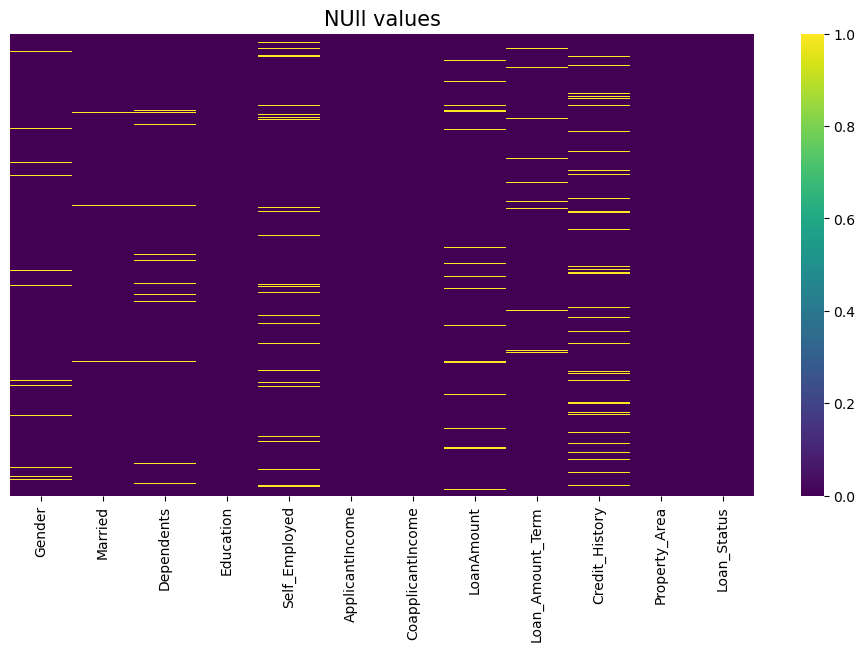

In [16]:
#Let's see null values by heatmap
plt.figure(figsize=(12,6))
plt.title('NUll values',fontsize=15)
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

This dataset has few Null Values which we will deal later.

In [17]:
# filling the missing values for numerical terms by - median
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [18]:
# Filling the missing values for categorical terms by - mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [19]:
#Let's check Null values now
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

So, Now there is no Null values in our dataset

<AxesSubplot:title={'center':'NUll values'}>

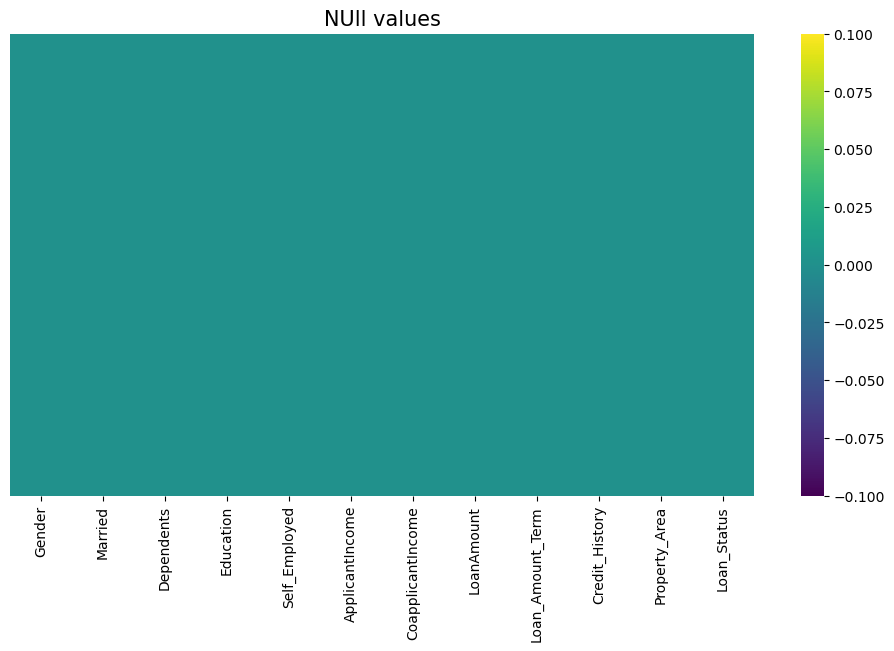

In [20]:
#Let's see null values by heatmap
plt.figure(figsize=(12,6))
plt.title('NUll values',fontsize=15)
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

There is no Null values now in dataset

# Segregation of Object and Numeric DataType for Analysis

In [21]:
## for Numeric Attributes
num_df=df.select_dtypes(exclude='object')

## for categorical Attributes
obj_df=df.select_dtypes(include='object')

<AxesSubplot:title={'center':'Correlation Heatmap'}>

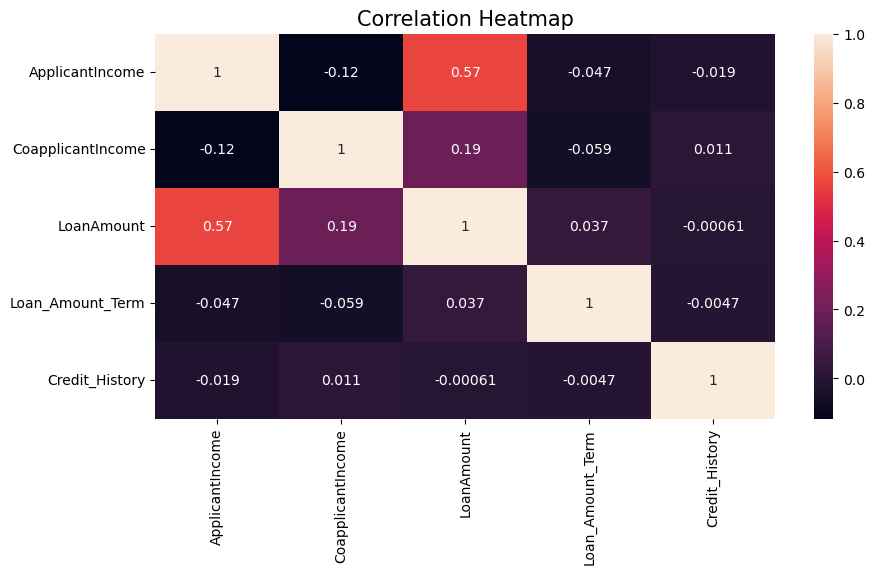

In [22]:
## correlation Plot
plt.figure(figsize=(10,5))
plt.title('Correlation Heatmap',fontsize=15)
sns.heatmap(df.corr(),annot=True)

Our Loan amount is highly correlated with Applicant Income which is .57.

Neither the strong positive nor the strong negative correlation present in any variable.

# Data Visualization

<AxesSubplot:title={'center':'Male Vs Female'}, xlabel='Gender', ylabel='count'>

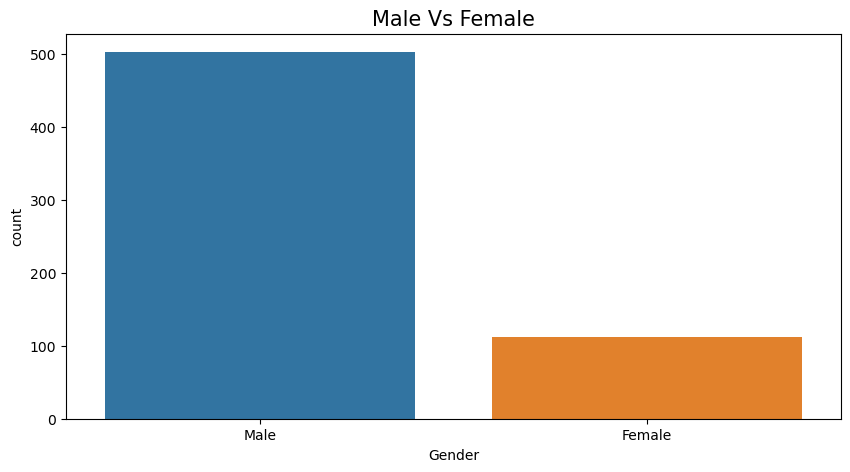

In [23]:
plt.figure(figsize=(10,5))
plt.title('Male Vs Female',fontsize=15)
sns.countplot(df['Gender'],data=df)

Almost 500 Male and 100 Female applied for the loan.

<AxesSubplot:title={'center':'Married Vs unmarried'}, xlabel='Married', ylabel='count'>

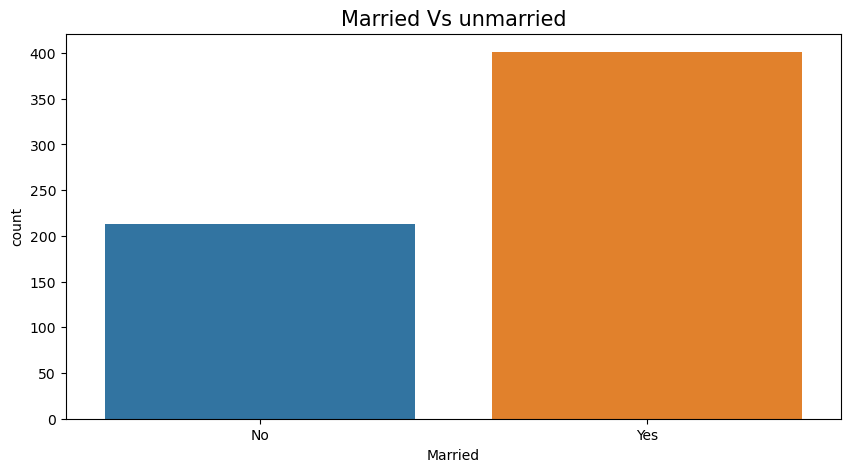

In [24]:
plt.figure(figsize=(10,5))
plt.title('Married Vs unmarried',fontsize=15)
sns.countplot(df['Married'])

Almost 400 married & more than 200 unmarried people applied for loan

<AxesSubplot:title={'center':'Dependents'}, xlabel='Dependents', ylabel='count'>

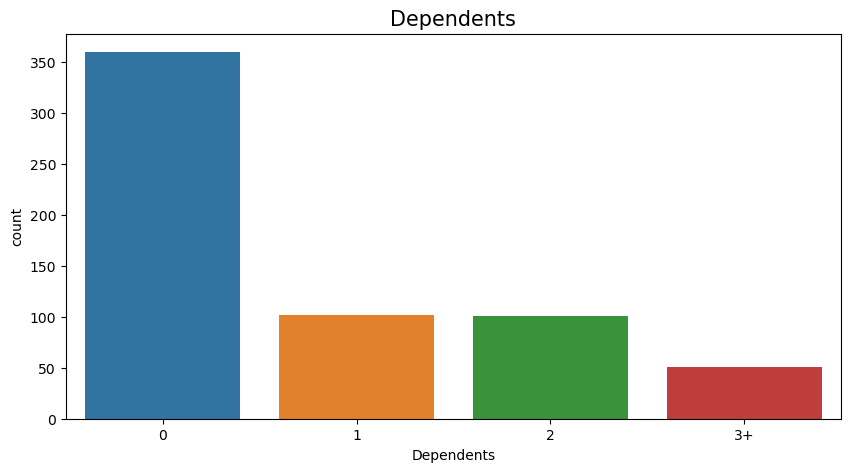

In [25]:
plt.figure(figsize=(10,5))
plt.title('Dependents',fontsize=15)
sns.countplot(df['Dependents'])

More than 350 people doesn't have any dependents and around 100 people have either 1 or 2 dependents in family. Less than 50 people are there who has more than 3 dependents in family.

<AxesSubplot:title={'center':'Self Employed'}, xlabel='Self_Employed', ylabel='count'>

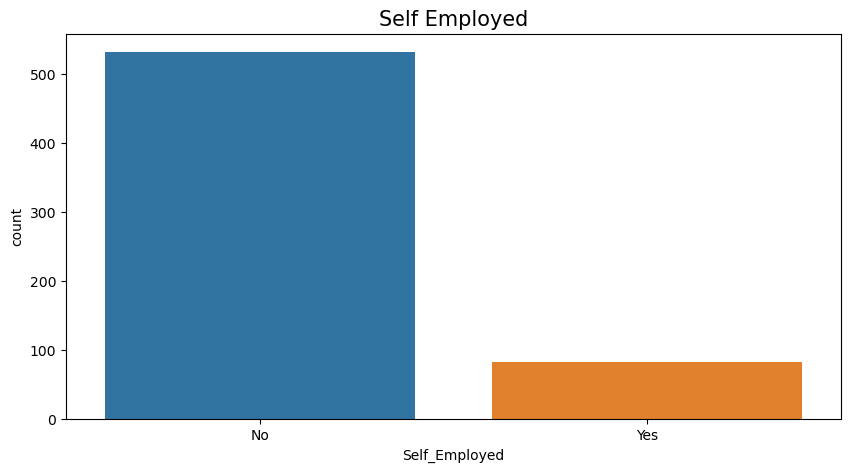

In [26]:
plt.figure(figsize=(10,5))
plt.title('Self Employed',fontsize=15)
sns.countplot(df['Self_Employed'])

more than 500 people applied for loan aren't self employed and more than 50 people are self employed.

<AxesSubplot:title={'center':'Loan Status'}, xlabel='Loan_Status', ylabel='count'>

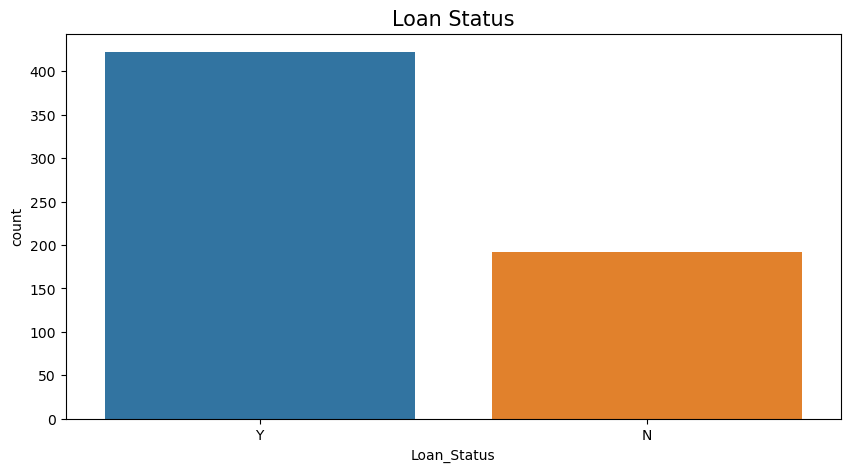

In [27]:
plt.figure(figsize=(10,5))
plt.title('Loan Status',fontsize=15)
sns.countplot(df['Loan_Status'])

more than 400 peoples loan aproved and more than 150 peoples loan not aproved.

<AxesSubplot:title={'center':'property area'}, xlabel='Property_Area', ylabel='count'>

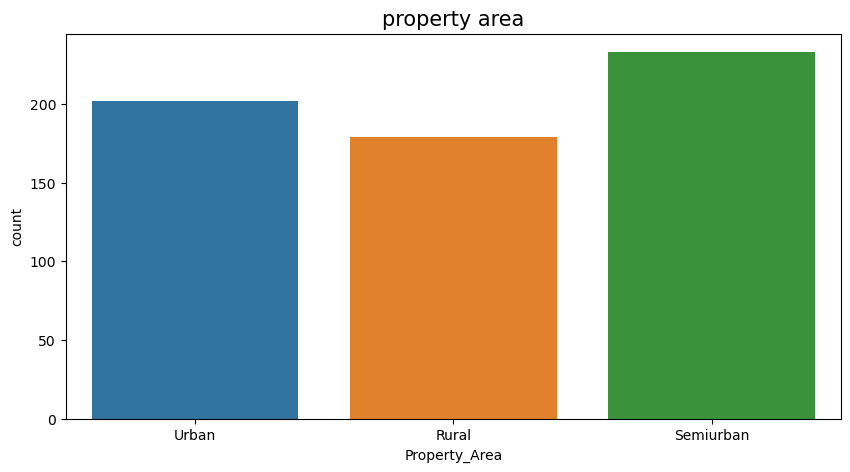

In [28]:
plt.figure(figsize=(10,5))
plt.title('property area',fontsize=15)
sns.countplot(df['Property_Area'])

More than 200 people belongs to Semiurban area, arond 200 people belongs to urban area and around 170-180 people belongs to Rural area.

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

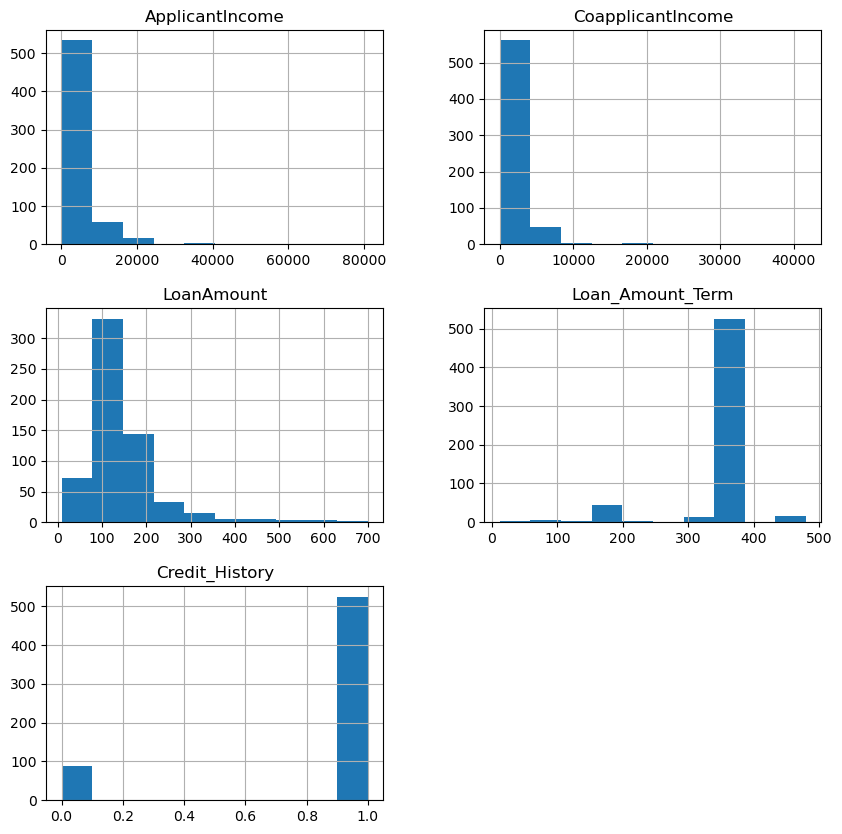

In [29]:
df.hist(figsize=(10,10))

# Bi-variate Analysis

In [30]:
# Creating a function
def relation_target(df,col):
    plt.figure(figsize=(15,6))
    plt.title(col+' Vs Loan_Status ',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
    sns.countplot(x =col, hue ="Loan_Status",palette='colorblind' ,data = df)
    plt.show()

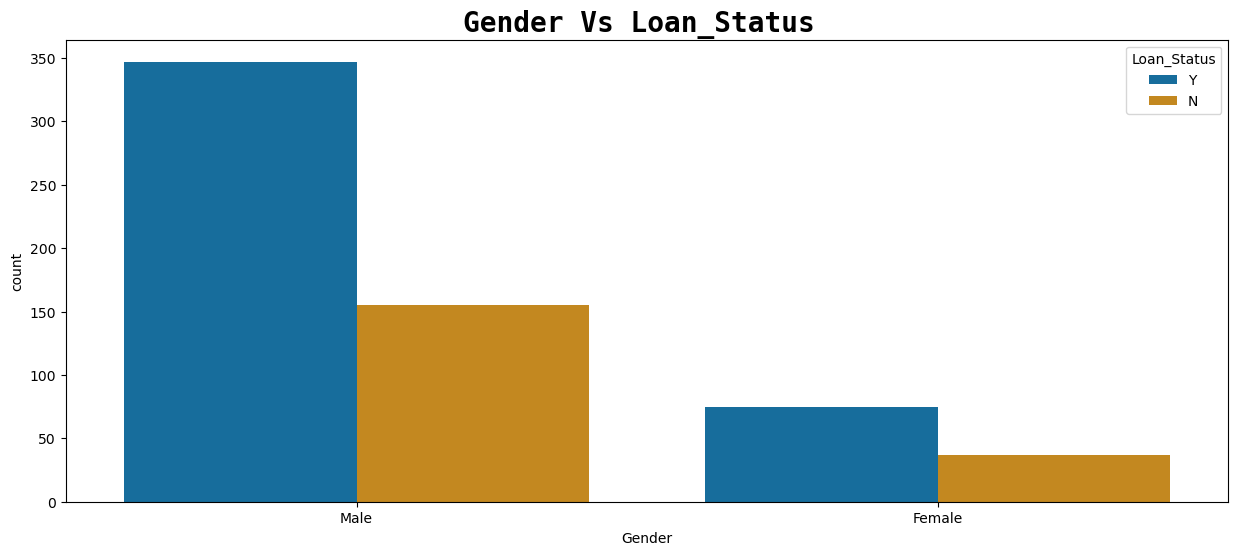

In [31]:
relation_target(df,'Gender')

We could see that Mostly Males sanctioned for loan as compaired to Females.

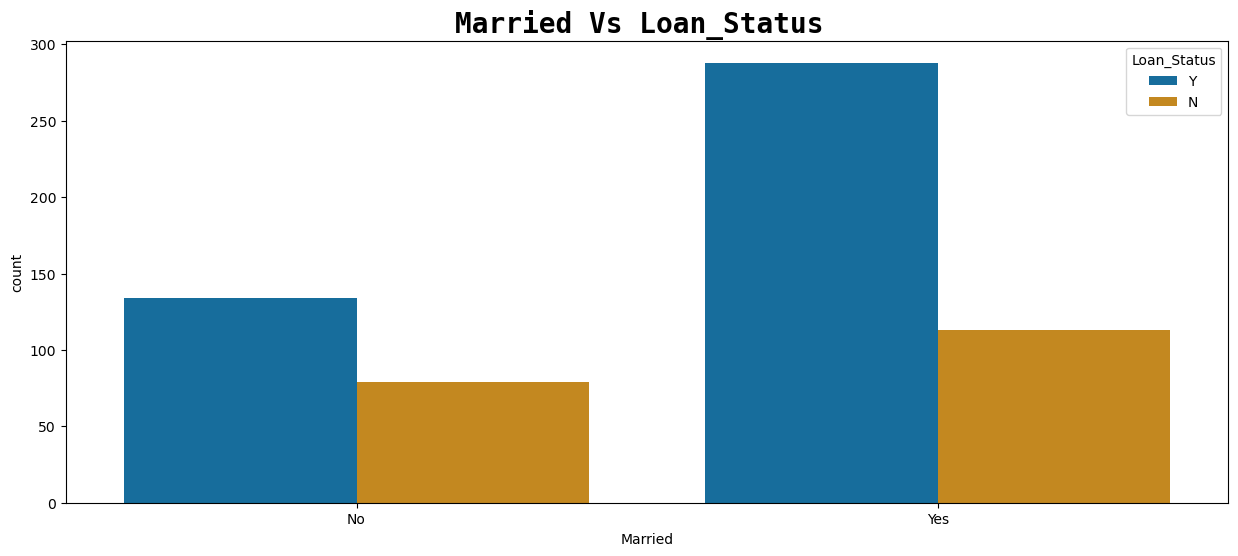

In [32]:
relation_target(df,'Married')

Around 300 applicants are married whose loans are approved as compared to the applicants who are not married but their loans were approved

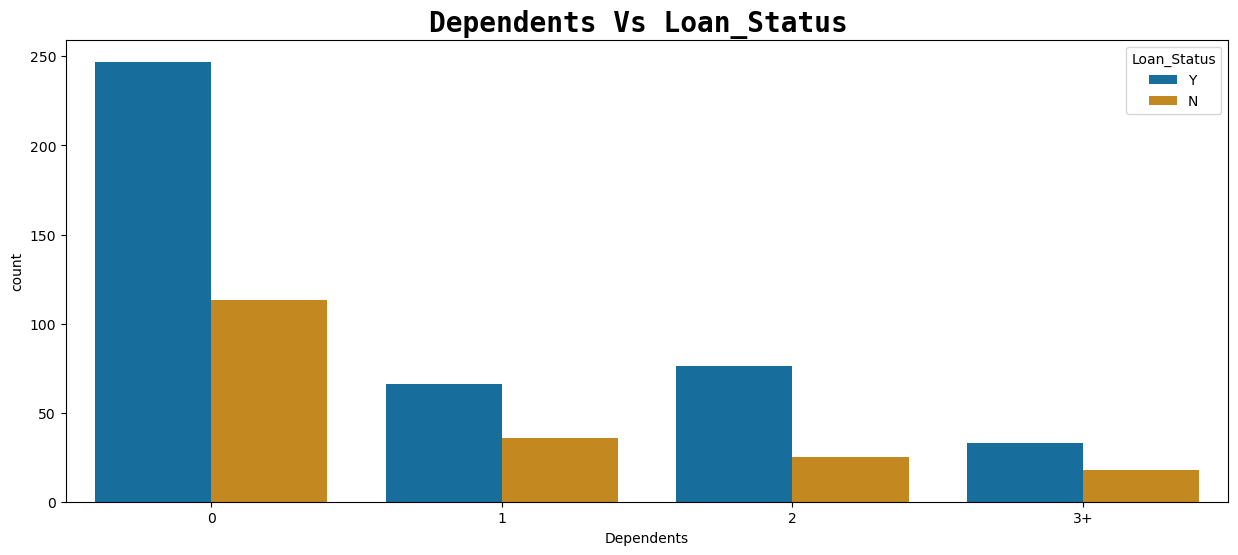

In [33]:
relation_target(df,'Dependents')

Majority of the applicants whose loans are approved have no or 0 dependency & the minimun loan approved to those who has higher number of dependents.

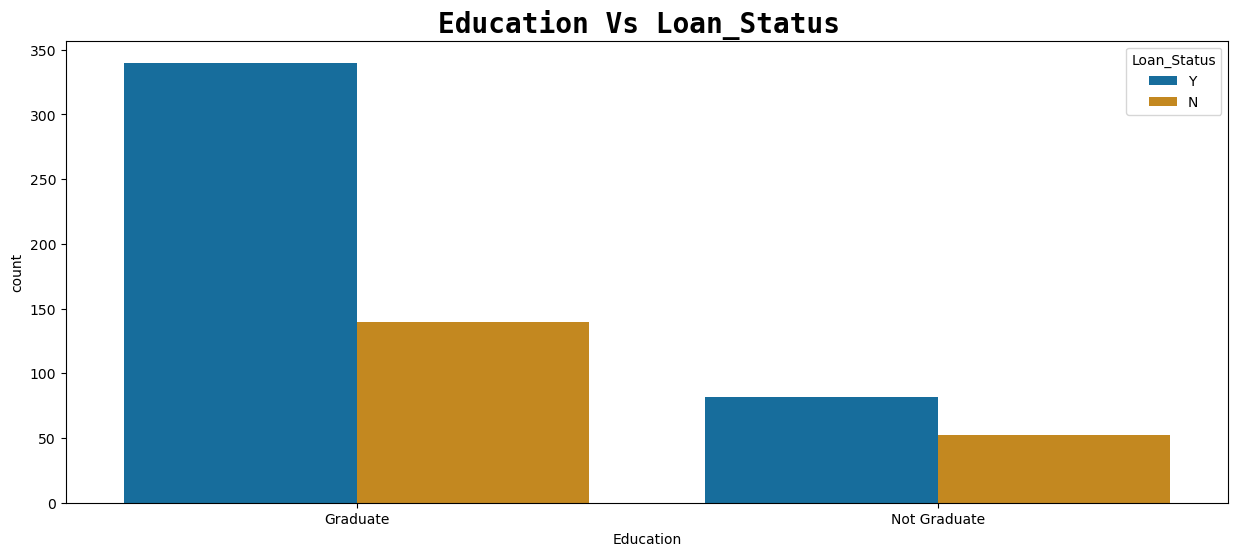

In [34]:
relation_target(df,'Education')

The count of graduates whose loans are approved is high as compared to the non graduates having approved loans

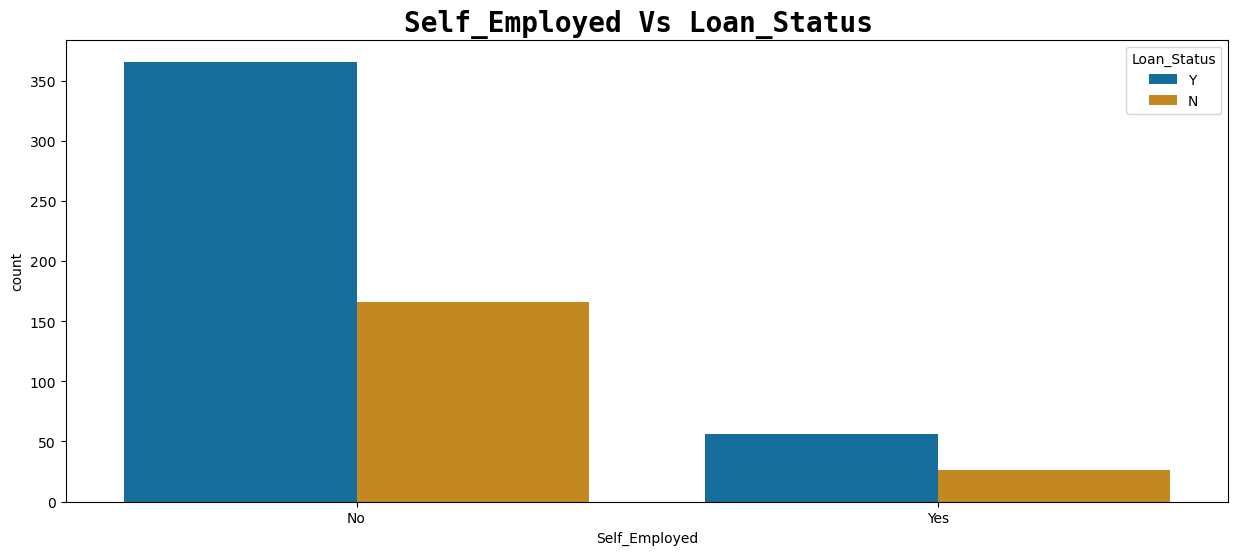

In [35]:
relation_target(df,'Self_Employed')

The percentage of self-employed applicants having approved loans is around 15% of the non self employed applicants having approved loans.

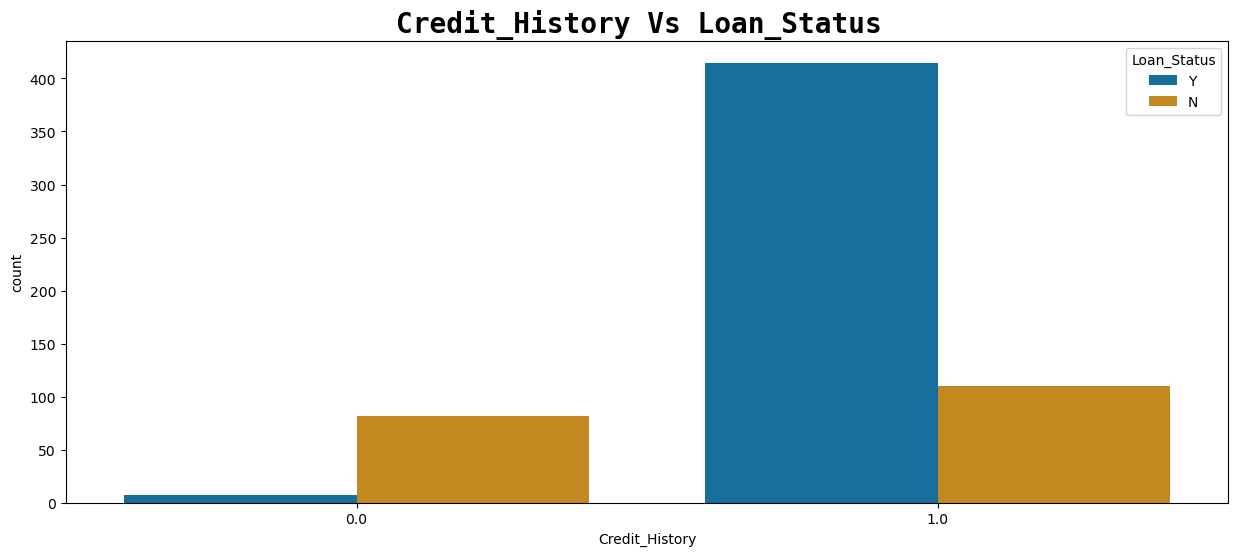

In [36]:
relation_target(df,'Credit_History')

People who has credit history 1 has the highest loan approval as compared to 0 credit history. People Who has zero credit score mostly they are denied to grant loan.

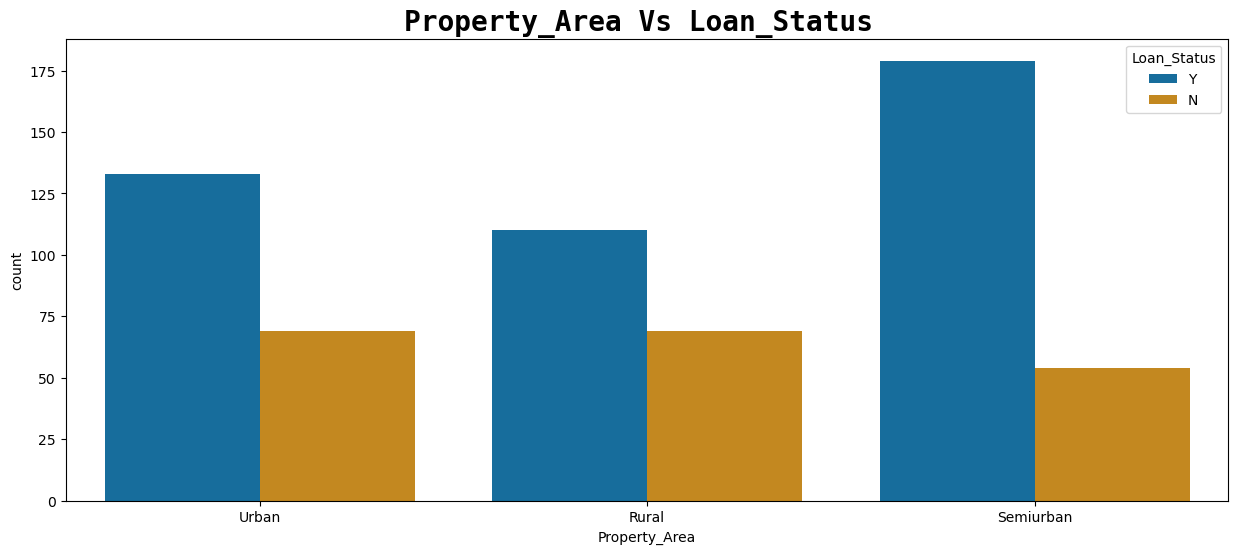

In [37]:
relation_target(df,'Property_Area')

The max. no. of applicants whose loans are approved belongs to or having property in semi-urban area.

In [38]:
def barplot_target(df,col):
    plt.figure(figsize=(15,6))
    plt.title(col+' Vs Loan_Status ',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
    sns.barplot(y =col, x="Loan_Status",palette='colorblind' ,data = df)
    plt.show() 

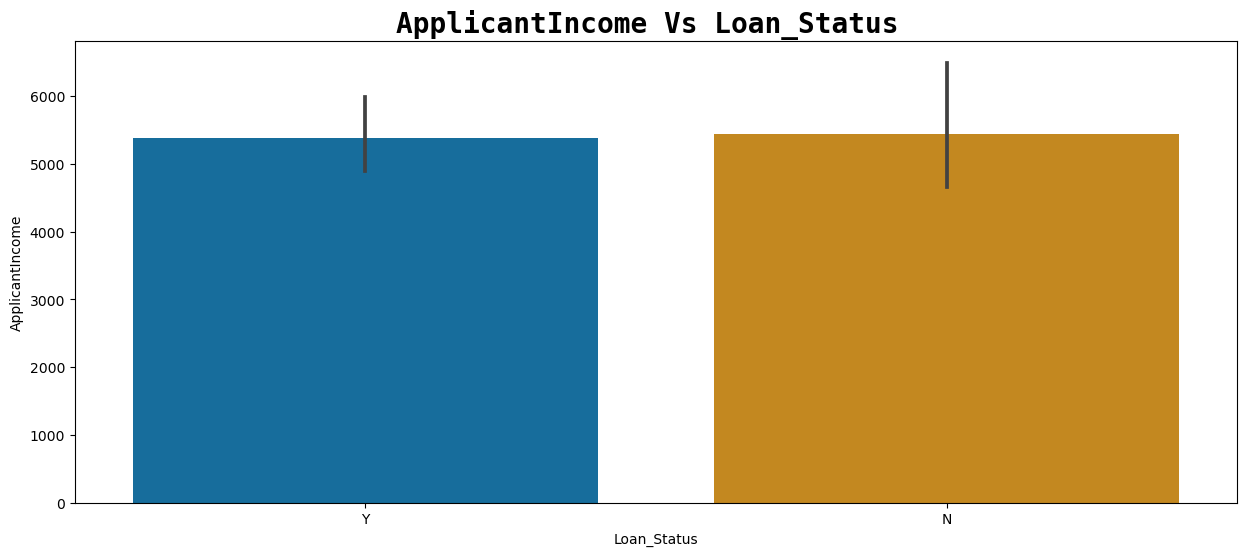

In [39]:
barplot_target(df,'ApplicantIncome')

There is almost similar income of people who sanction loans/ denied. Applicant income has no significance to decide whether loan will approve or not.

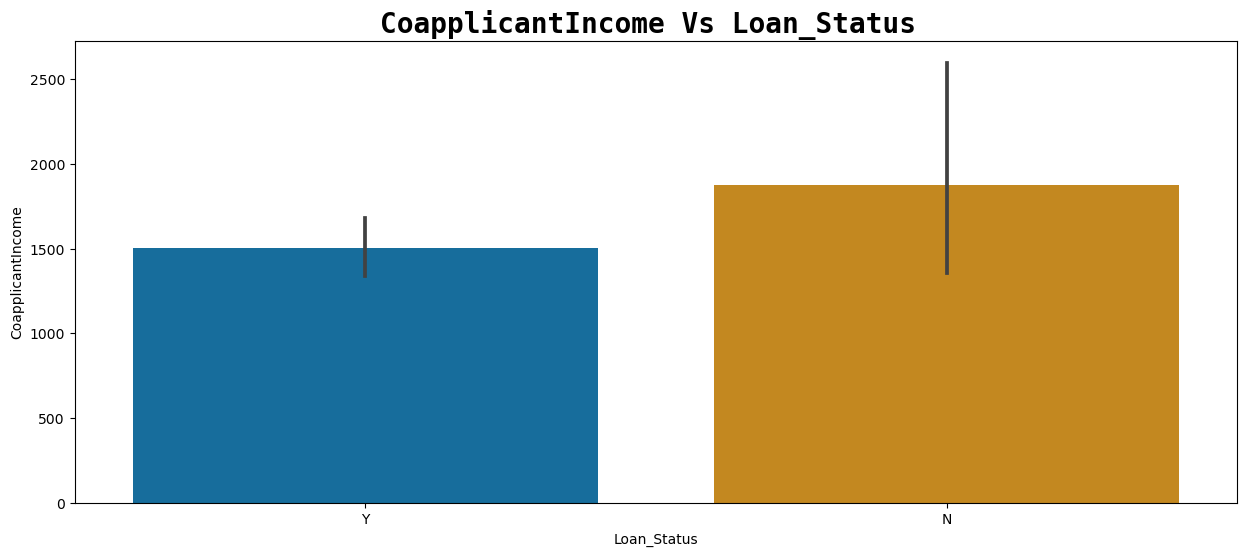

In [40]:
barplot_target(df,'CoapplicantIncome')

We can observe that, if co applicant income is higher than 1500, there are chances of denial to loan.

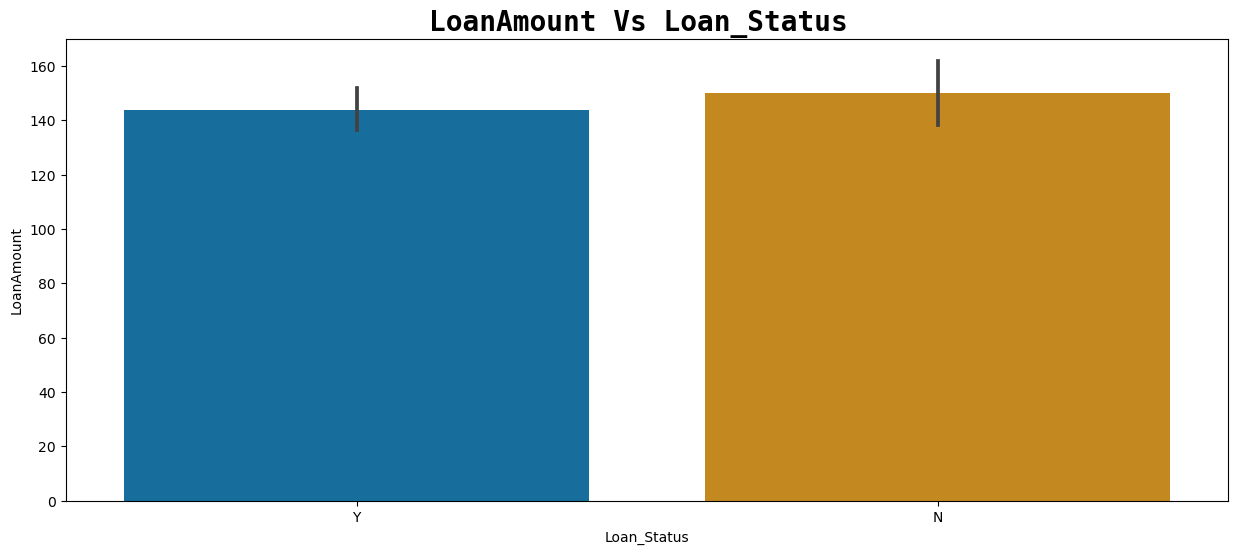

In [41]:
barplot_target(df,'LoanAmount')

There is almost similar trend regarding Loan Amount. There is no relation between Loan Amount and Loan Status.

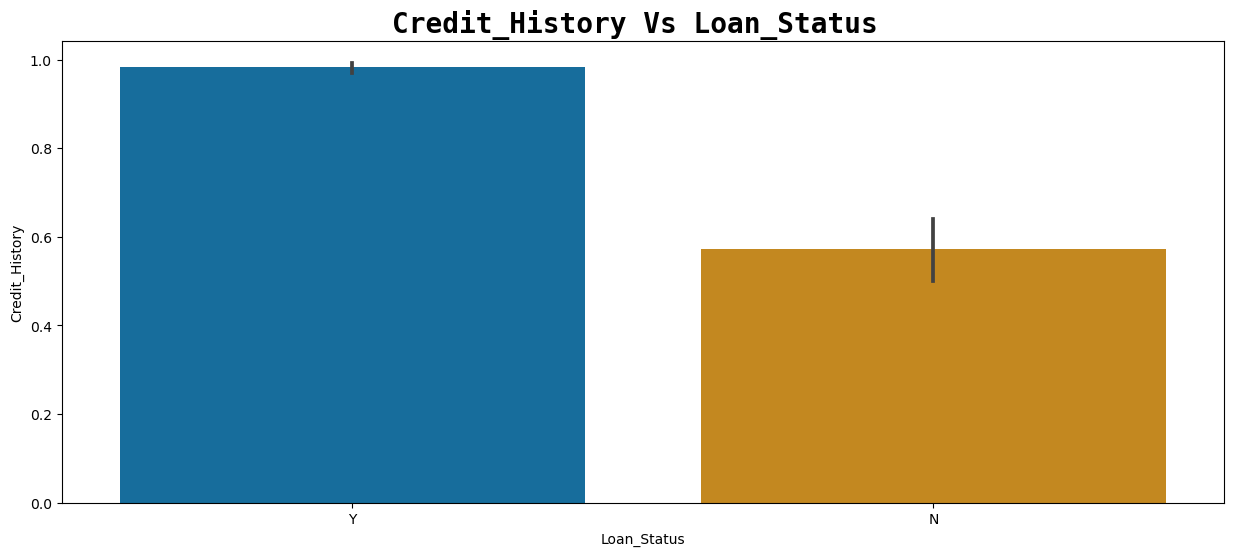

In [42]:
barplot_target(df,'Credit_History')

As earlier we can see that a person who has credit history one has highest loan approval rate

# Relation With Applicant Income and Other Attributes

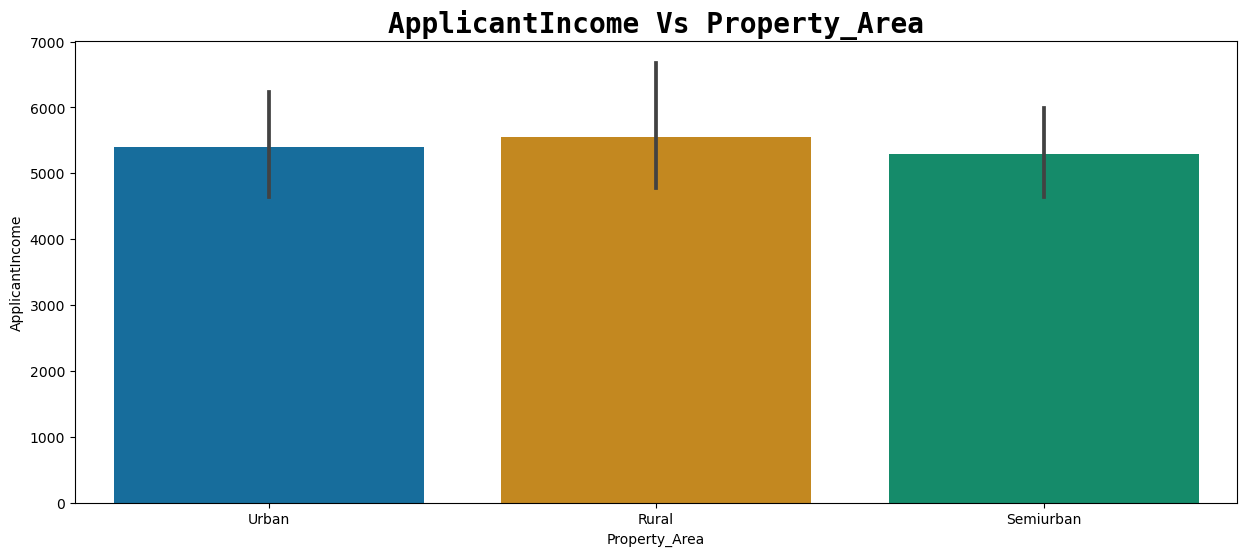

In [43]:
plt.figure(figsize=(15,6))
plt.title('ApplicantIncome Vs Property_Area',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Property_Area",palette='colorblind' ,data = df)
plt.show()

There is almost similar income status of applicants belong from different regions.

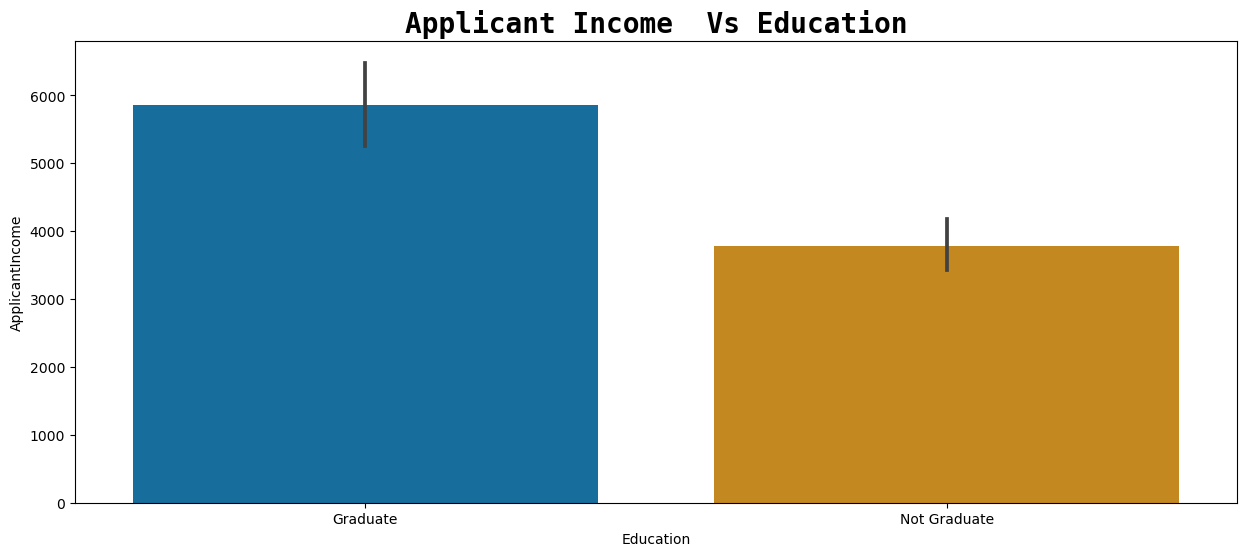

In [44]:
plt.figure(figsize=(15,6))
plt.title('Applicant Income  Vs Education',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Education",palette='colorblind' ,data = df)
plt.show()

Graduate Applicant's income is higher than non Graduate Applicants.

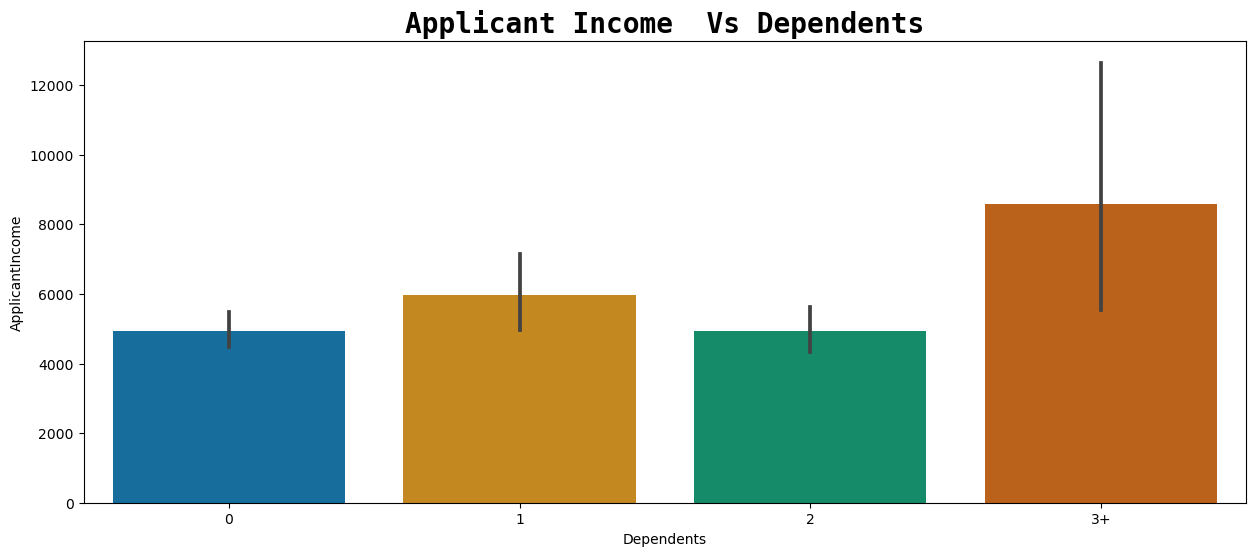

In [45]:
plt.figure(figsize=(15,6))
plt.title('Applicant Income  Vs Dependents',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Dependents",palette='colorblind' ,data = df)
plt.show()

The Applicant who has maximum number of depenents has higher income (8000+).

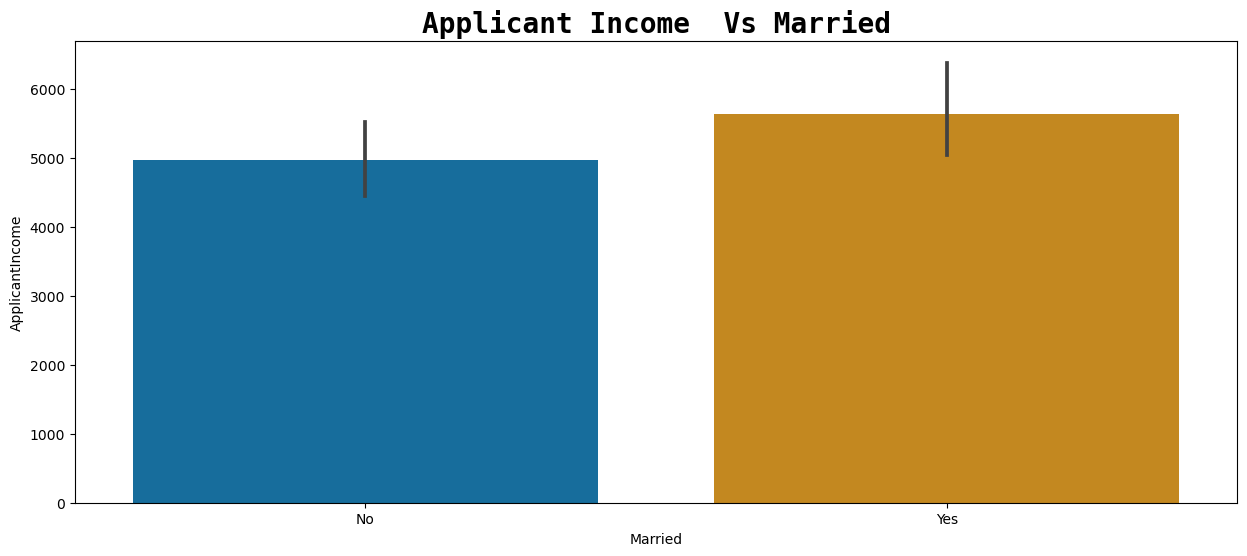

In [46]:
plt.figure(figsize=(15,6))
plt.title('Applicant Income  Vs Married',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Married",palette='colorblind' ,data = df)
plt.show()

The Applicant who are married has higher income as compared to unmarried applicants.

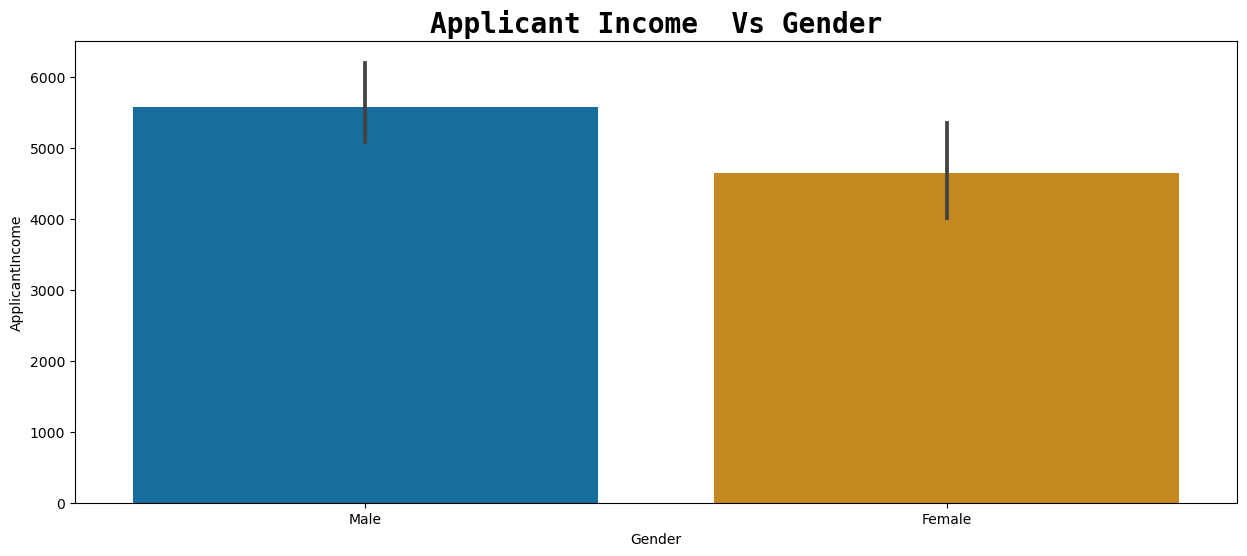

In [47]:
plt.figure(figsize=(15,6))
plt.title('Applicant Income  Vs Gender',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Gender",palette='colorblind' ,data = df)
plt.show()

Male applicant's income is higher than the female applicants.

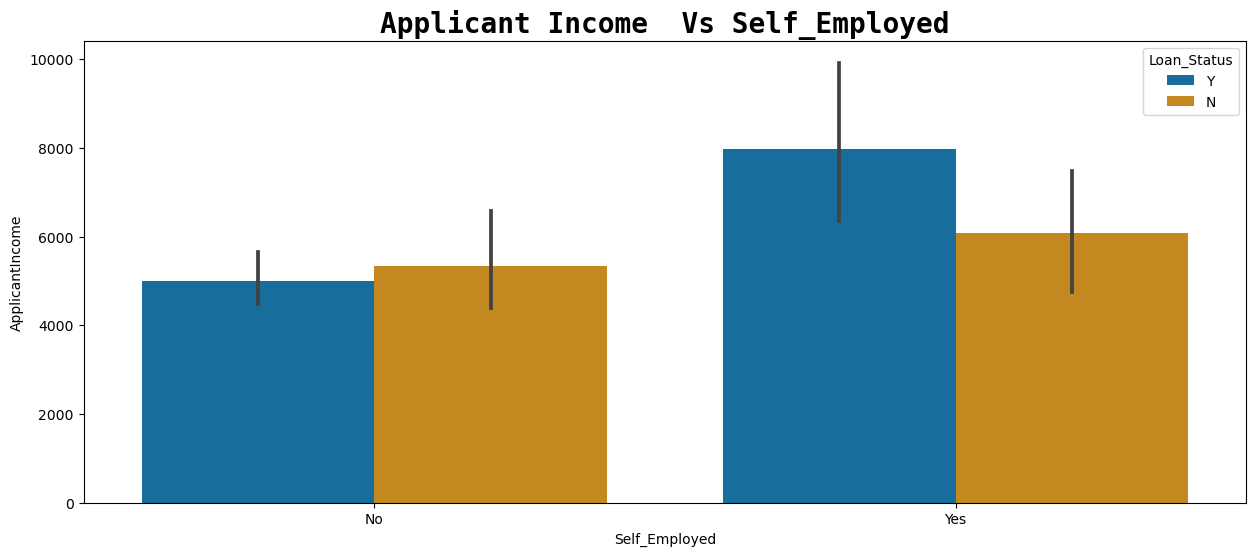

In [48]:
plt.figure(figsize=(15,6))
plt.title('Applicant Income  Vs Self_Employed',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Self_Employed",hue='Loan_Status',palette='colorblind' ,data = df)
plt.show()

We could see that the person who are self employed are earning well and their loan approval rate is also high as compared to non-self employed.

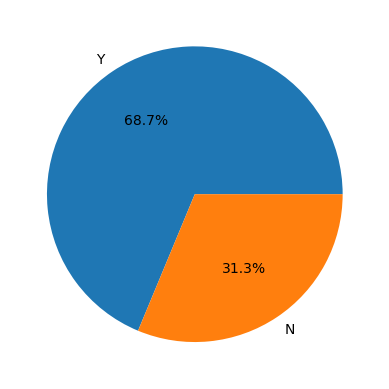

In [49]:
# Checking data imbalancing
temp = df['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()

Here we have an imbalanced dataset. We will have to balance it before training any model on this data.

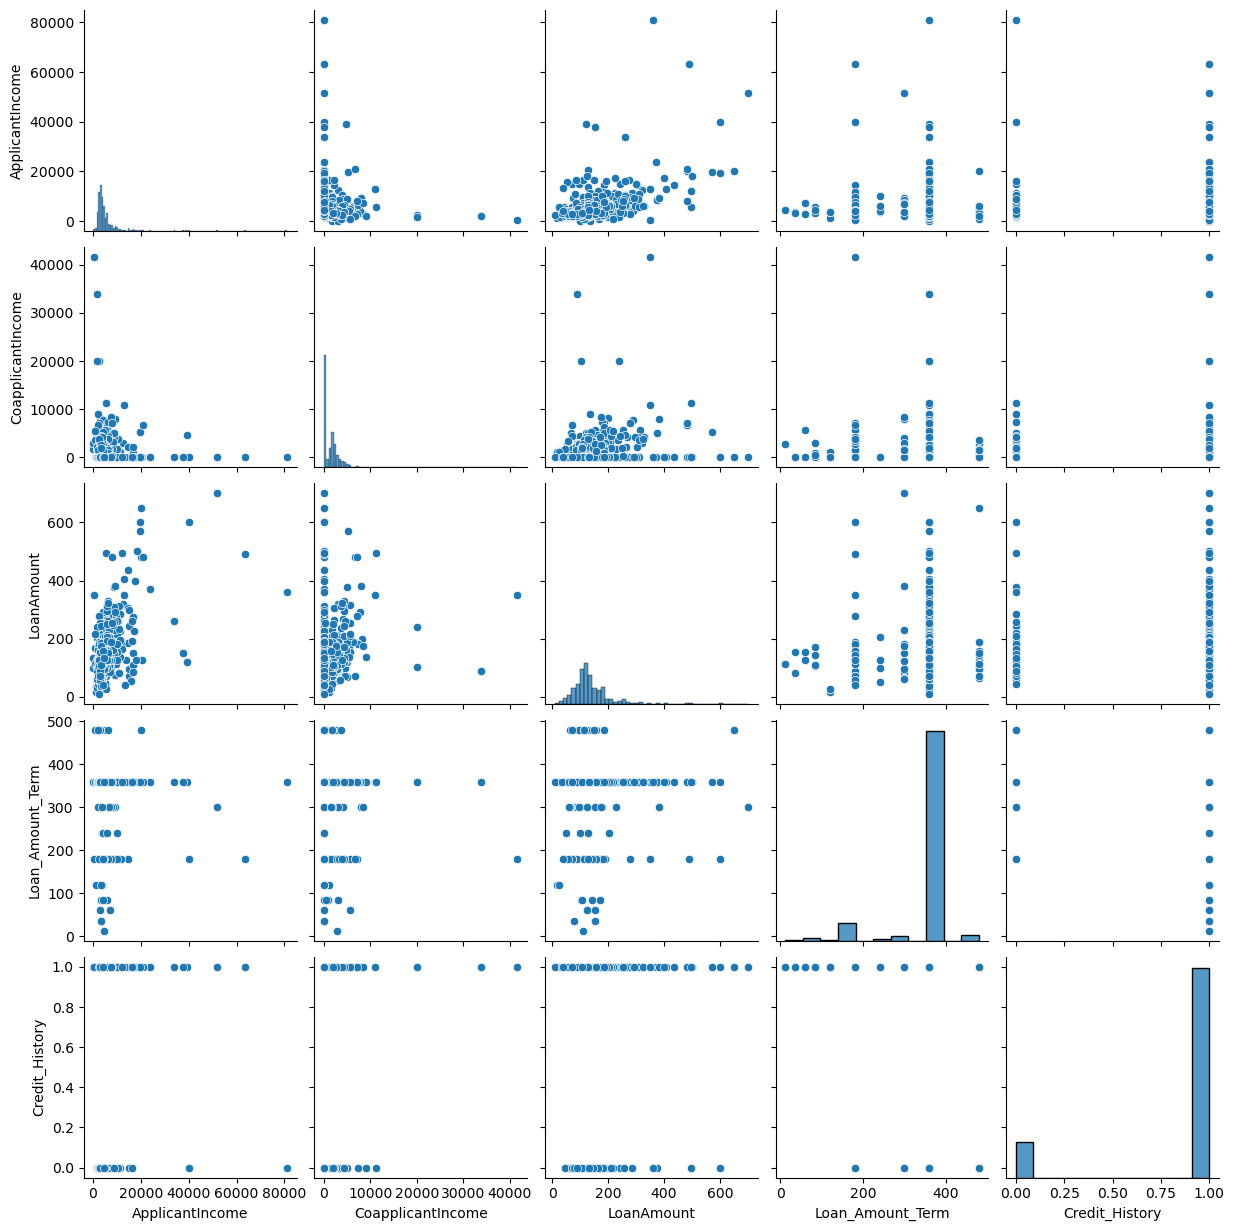

In [50]:
# Plotting a pair plot
sns.pairplot(df)

# Distribution

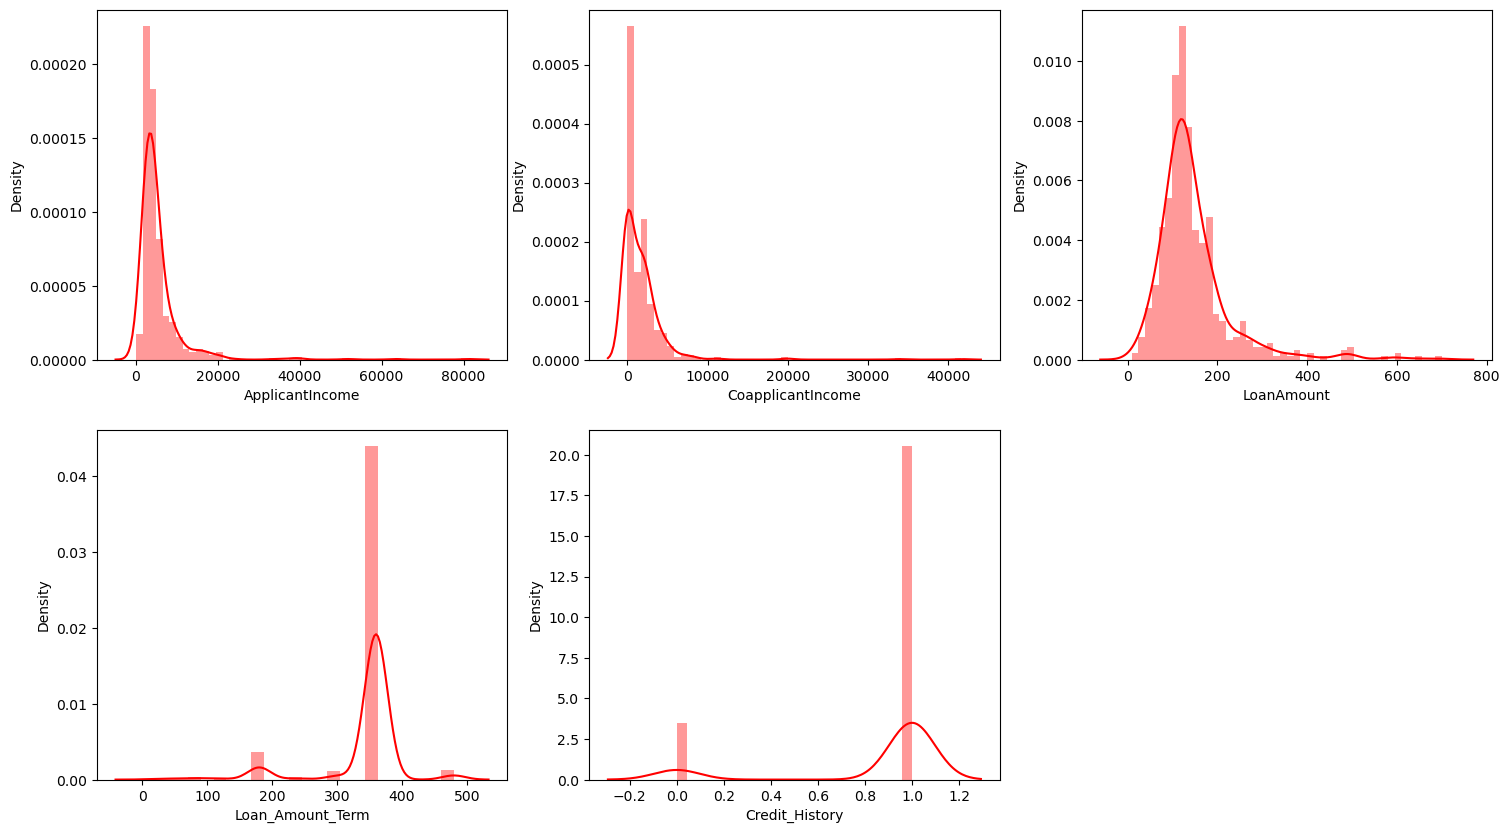

In [51]:
plt.figure(figsize=(18,10))
plot=1
for col in num_df:
    if plot<=6:
        plt.subplot(2,3,plot)
        sns.distplot(df[col],color='red')
        plt.xlabel(col)
        plot=plot+1
plt.show()

:       We can see that applicants income, Co-applicants income, Loan Amount are right skewed.

:       Loan Amount Term has majority values of 360 months.

:       Credit history has only two values (0 or 1 ). In which majority values are One.

# Outliers Detection

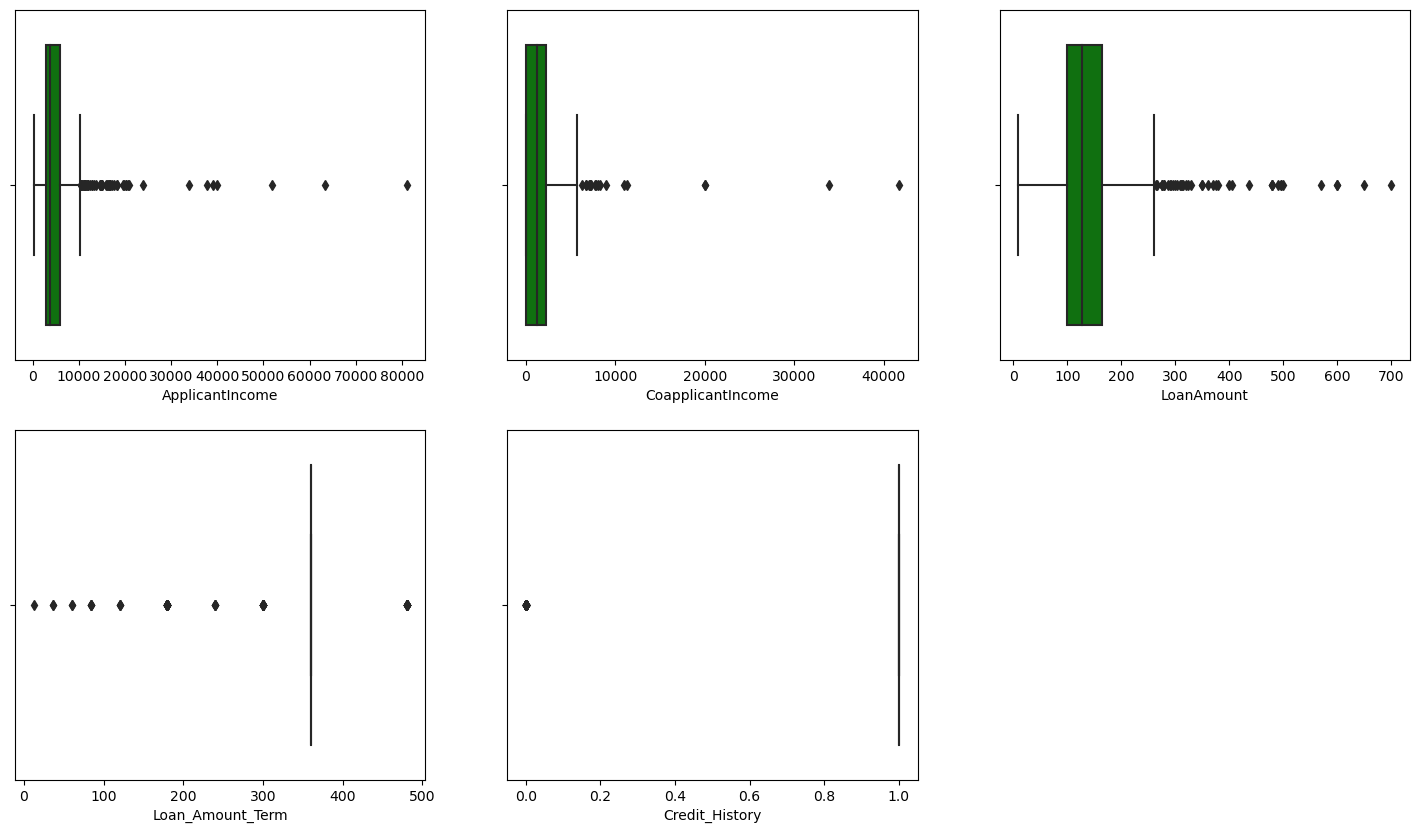

In [52]:
plt.figure(figsize=(18,10))
plot=1
for col in num_df:
    if plot<=6:
        plt.subplot(2,3,plot)
        sns.boxplot(df[col],color='green')
        plt.xlabel(col)
        plot=plot+1
plt.show()

Outliers are present in Appilcants Income, Coapplicants Income and Loan Amounts.

# Outliers Treatment

In [53]:
## when data is normally distributed.
def replace_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_limit=df[col].quantile(.25)-(1.5*IQR)
    upper_limit=df[col].quantile(.75)+(1.5*IQR)
    non_outlier=np.where((df[col]<lower_limit )|(df[col]>upper_limit),df[col].median(),df[col])
    df[col]=non_outlier
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.subplot(1,2,2)
    sns.boxplot(df[col])

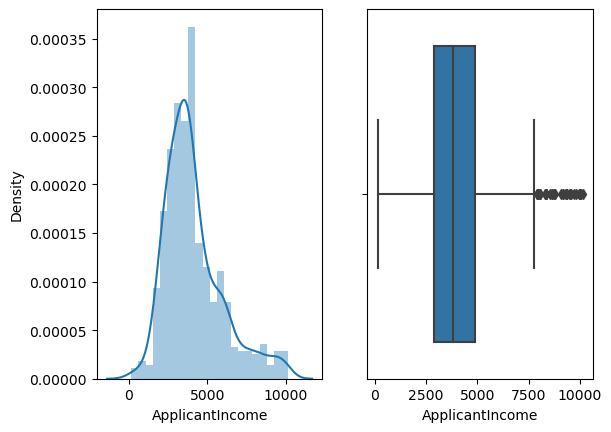

In [54]:
replace_outlier(df,'ApplicantIncome')

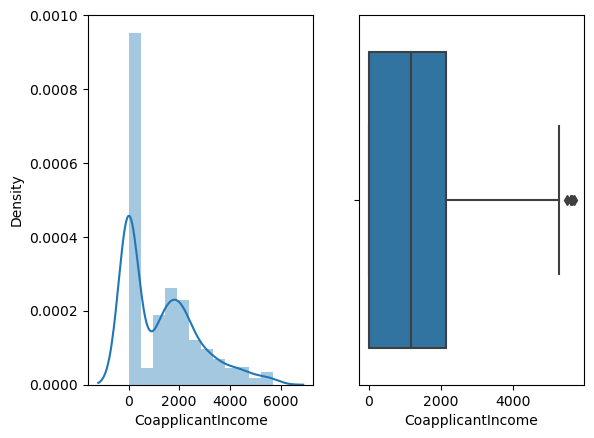

In [55]:
replace_outlier(df,'CoapplicantIncome')

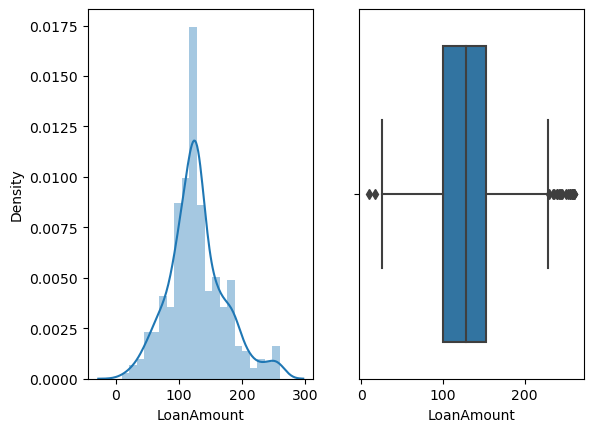

In [56]:
replace_outlier(df,'LoanAmount')

We have sucesfully replace our outliers from Applicant income,Co applicant Income & Loan Amount.

# Skewness

In [57]:
df_1=df.copy()

In [58]:
df_1.skew()

ApplicantIncome      1.149106
CoapplicantIncome    0.936471
LoanAmount           0.498333
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [59]:
df_1['ApplicantIncome']=np.sqrt(df_1['ApplicantIncome'])

In [60]:
df_1['CoapplicantIncome']=np.sqrt(df_1['CoapplicantIncome'])

In [61]:
df_1['LoanAmount']=np.sqrt(df_1['LoanAmount'])

In [62]:
df_1.skew()

ApplicantIncome      0.438048
CoapplicantIncome    0.152060
LoanAmount          -0.242054
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

We have removed skewness to its possible extent.

# Label Encoding

In [63]:
# converting categorical column into numeric using label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in obj_df:
    df_1[col]=le.fit_transform(df_1[col])

In [64]:
df_1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,76.478755,0.000000,11.313708,360.0,1.0,2,1
1,1,1,1,0,0,67.697858,38.832976,11.313708,360.0,1.0,0,0
2,1,1,0,0,1,54.772256,0.000000,8.124038,360.0,1.0,2,1
3,1,1,0,1,0,50.823223,48.559242,10.954451,360.0,1.0,2,1
4,1,0,0,0,0,77.459667,0.000000,11.874342,360.0,1.0,2,1


# Splitting Data into Input and Output Variable

In [65]:
x = df_1.drop(['Loan_Status'],axis=1)
y = df_1['Loan_Status']

In [66]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,76.478755,0.000000,11.313708,360.0,1.0,2
1,1,1,1,0,0,67.697858,38.832976,11.313708,360.0,1.0,0
2,1,1,0,0,1,54.772256,0.000000,8.124038,360.0,1.0,2
3,1,1,0,1,0,50.823223,48.559242,10.954451,360.0,1.0,2
4,1,0,0,0,0,77.459667,0.000000,11.874342,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,53.851648,0.000000,8.426150,360.0,1.0,0
610,1,1,3,0,0,64.078077,0.000000,6.324555,180.0,1.0,0
611,1,1,1,0,0,89.844310,15.491933,15.905974,360.0,1.0,2
612,1,1,2,0,0,87.080423,0.000000,13.674794,360.0,1.0,2


In [67]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

# Balancing The Data

In [68]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
x_train, x_val,y_train, y_val = train_test_split(x,y,test_size=0.2,random_state=0)
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
x , y = ros.fit_resample(x_train , y_train)
  
x_train.shape , x.shape

((491, 11), (664, 11))

# Feature Scaling

In [69]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.452859,0.720729,-0.758604,-0.544862,-0.398514,-0.595073,1.213757,0.166210,0.251113,0.533229,-0.028248
1,0.452859,-1.387483,0.232957,-0.544862,-0.398514,-0.052819,-0.992105,1.413565,0.251113,0.533229,-0.028248
2,0.452859,0.720729,-0.758604,-0.544862,-0.398514,0.027338,0.713108,0.537823,0.251113,-1.875368,-1.278688
3,-2.208191,-1.387483,-0.758604,-0.544862,-0.398514,-0.052521,-0.992105,-0.163488,-2.524789,0.533229,1.222192
4,0.452859,0.720729,1.224519,-0.544862,-0.398514,0.453432,0.533414,0.557791,0.251113,0.533229,-0.028248
...,...,...,...,...,...,...,...,...,...,...,...
659,0.452859,0.720729,1.224519,-0.544862,-0.398514,-0.060285,1.465605,1.753881,0.251113,-1.875368,1.222192
660,0.452859,0.720729,1.224519,-0.544862,2.509323,-1.655378,0.420039,2.126302,0.251113,0.533229,1.222192
661,0.452859,0.720729,-0.758604,1.835326,2.509323,0.254021,0.119162,-0.868083,0.251113,0.533229,-0.028248
662,0.452859,-1.387483,-0.758604,-0.544862,-0.398514,-1.117621,-0.992105,-1.546883,2.101715,-1.875368,-0.028248


Standardization doesn’t have any fixed minimum or maximum value. Here, the values of all the columns are scaled in such a way that they all have a mean equal to 0 and standard deviation equal to 1. This scaling technique works well with outliers. Thus, this technique is preferred if outliers are present in the dataset.

# Feature Importance

In [70]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [71]:
print(extra.feature_importances_)

[0.02179909 0.02267014 0.07420534 0.02352342 0.02539543 0.19765315
 0.10085235 0.17435794 0.05048368 0.24128095 0.06777852]


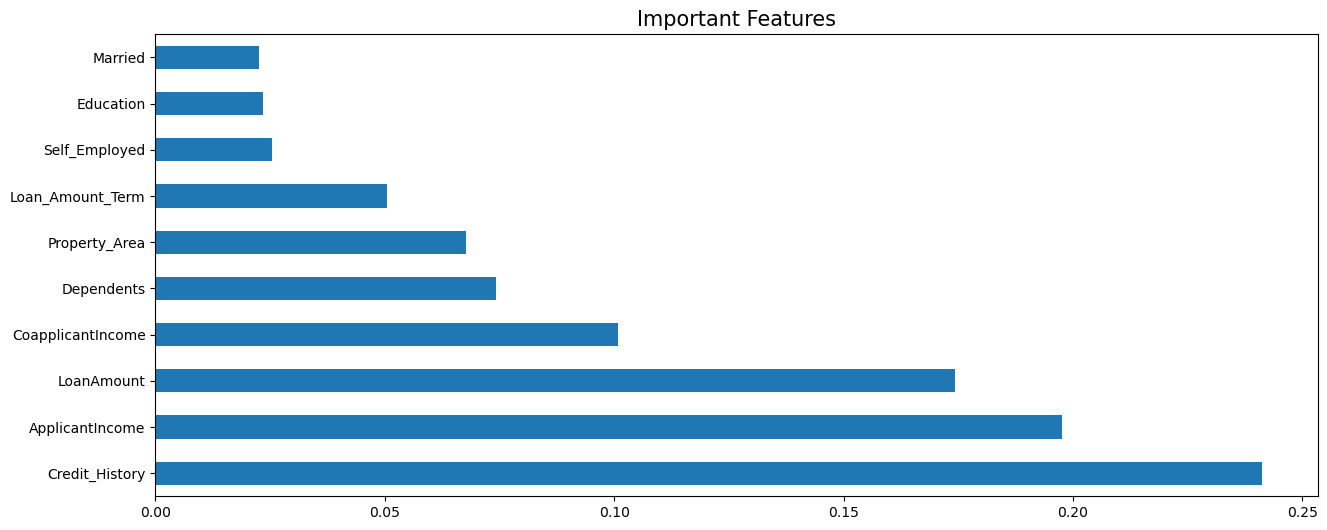

In [72]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

# Model Building

# Importing Packages For Classification Algoritham

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [88]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i,stratify=y)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean())
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std())
    print('\n')
    print('F1 score',f1_score(y_test,pred))
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
 
    print("\n\n")
    return final_r

In [89]:
## Logistic Regression
lg=LogisticRegression()
max_accuracy_score(lg,x,y)

max accuracy score corresponding to 89 is 0.7894736842105263


cross validation score 0.7002961950330372


Standard Deviation 0.02099742331813525


F1 score 0.7904191616766467


Training accuracy 0.7062146892655368


Test Accuracy 0.7368421052631579


Confusion Matrix [[32 34]
 [ 1 66]]


Classification Report               precision    recall  f1-score   support

           0       0.97      0.48      0.65        66
           1       0.66      0.99      0.79        67

    accuracy                           0.74       133
   macro avg       0.81      0.73      0.72       133
weighted avg       0.81      0.74      0.72       133








89

In [90]:
## DEcision Tree
dt=DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

max accuracy score corresponding to 59 is 0.8872180451127819


cross validation score 0.8419799498746867


Standard Deviation 0.04271032613688229


F1 score 0.883720930232558


Training accuracy 1.0


Test Accuracy 0.8872180451127819


Confusion Matrix [[61  5]
 [10 57]]


Classification Report               precision    recall  f1-score   support

           0       0.86      0.92      0.89        66
           1       0.92      0.85      0.88        67

    accuracy                           0.89       133
   macro avg       0.89      0.89      0.89       133
weighted avg       0.89      0.89      0.89       133








59

In [91]:
## KNn
knn=KNeighborsClassifier()
max_accuracy_score(knn,x,y)

max accuracy score corresponding to 53 is 0.7443609022556391


cross validation score 0.6672248803827752


Standard Deviation 0.023246852730769926


F1 score 0.7599999999999999


Training accuracy 0.775894538606403


Test Accuracy 0.7293233082706767


Confusion Matrix [[40 26]
 [10 57]]


Classification Report               precision    recall  f1-score   support

           0       0.80      0.61      0.69        66
           1       0.69      0.85      0.76        67

    accuracy                           0.73       133
   macro avg       0.74      0.73      0.72       133
weighted avg       0.74      0.73      0.73       133








53

In [92]:
##Naive Bayes
gnb=GaussianNB()
max_accuracy_score(gnb,x,y)

max accuracy score corresponding to 89 is 0.7894736842105263


cross validation score 0.7032695374800638


Standard Deviation 0.0402982757829823


F1 score 0.7836257309941521


Training accuracy 0.7024482109227872


Test Accuracy 0.7218045112781954


Confusion Matrix [[29 37]
 [ 0 67]]


Classification Report               precision    recall  f1-score   support

           0       1.00      0.44      0.61        66
           1       0.64      1.00      0.78        67

    accuracy                           0.72       133
   macro avg       0.82      0.72      0.70       133
weighted avg       0.82      0.72      0.70       133








89

In [93]:
#Random forest
rf=RandomForestClassifier()
max_accuracy_score(rf,x,y)

max accuracy score corresponding to 83 is 0.9699248120300752


cross validation score 0.9172362724994304


Standard Deviation 0.035363662404365316


F1 score 0.9333333333333335


Training accuracy 1.0


Test Accuracy 0.9323308270676691


Confusion Matrix [[61  5]
 [ 4 63]]


Classification Report               precision    recall  f1-score   support

           0       0.94      0.92      0.93        66
           1       0.93      0.94      0.93        67

    accuracy                           0.93       133
   macro avg       0.93      0.93      0.93       133
weighted avg       0.93      0.93      0.93       133








83

In [94]:
## adaboost
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,x,y)

max accuracy score corresponding to 56 is 0.8195488721804511


cross validation score 0.722818409660515


Standard Deviation 0.027507760706141932


F1 score 0.7922077922077922


Training accuracy 0.815442561205273


Test Accuracy 0.7593984962406015


Confusion Matrix [[40 26]
 [ 6 61]]


Classification Report               precision    recall  f1-score   support

           0       0.87      0.61      0.71        66
           1       0.70      0.91      0.79        67

    accuracy                           0.76       133
   macro avg       0.79      0.76      0.75       133
weighted avg       0.78      0.76      0.75       133








56

In [96]:
## Gardient Boost
gb=GradientBoostingClassifier()
max_accuracy_score(gb,x,y)

max accuracy score corresponding to 89 is 0.8721804511278195


cross validation score 0.7952039188881294


Standard Deviation 0.02097753653245755


F1 score 0.8333333333333334


Training accuracy 0.9340866290018832


Test Accuracy 0.8195488721804511


Confusion Matrix [[49 17]
 [ 7 60]]


Classification Report               precision    recall  f1-score   support

           0       0.88      0.74      0.80        66
           1       0.78      0.90      0.83        67

    accuracy                           0.82       133
   macro avg       0.83      0.82      0.82       133
weighted avg       0.83      0.82      0.82       133








89

In [97]:
best_model=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','KNN','GaussianNB','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier'],
                         'Accuracy Score':[78.94,88.72,74.43,78.94,96.99,81.95,87.21]})
best_model               

,Model,Accuracy Score
0,LogisticRegression,78.94
1,DecisionTreeClassifier,88.72
2,KNN,74.43
3,GaussianNB,78.94
4,RandomForestClassifier,96.99
5,AdaBoostClassifier,81.95
6,GradientBoostingClassifier,87.21


# Conclusion:

Based on the above data frame and accuracy check for all the model, We conclude that Random Forest is Most generalised model among all because it gives us highest accuracy of 96.99 . So this would be our best model to predict the loan approval status.